# Lab 6: Diagnostic tests

### Required packages

In [4]:
library(TSA)
library(astsa)

#### Color property from 35 consecutive batches in an industrial process.


Call:
arima(x = color, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5705    74.3293
s.e.  0.1435     1.9151

sigma^2 estimated as 24.83:  log likelihood = -106.07,  aic = 216.15

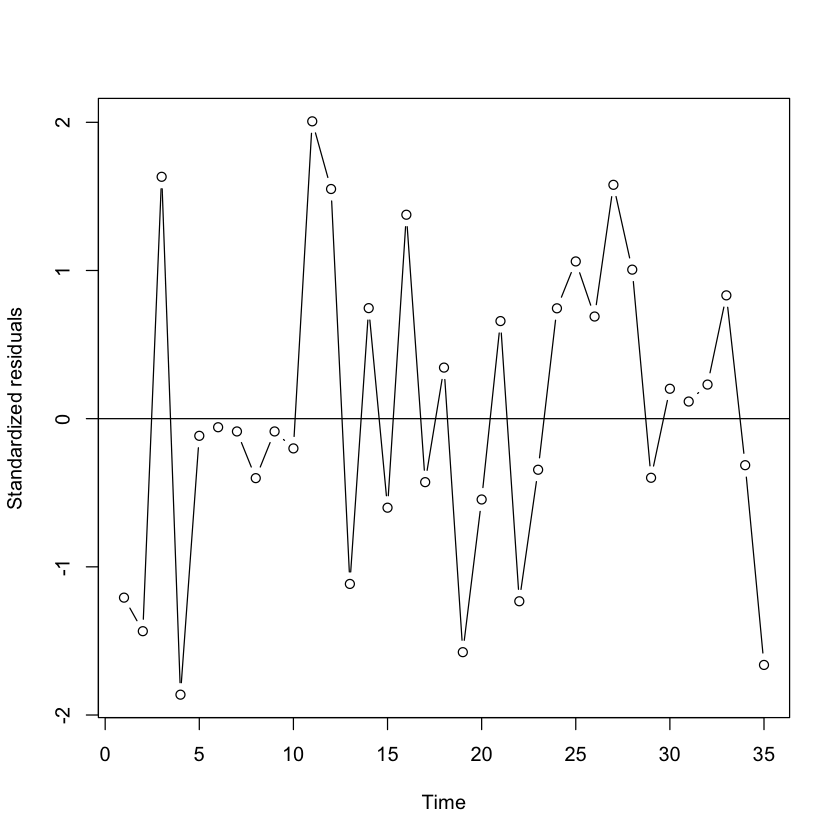


	Shapiro-Wilk normality test

data:  residuals(m1.color)
W = 0.97536, p-value = 0.6057


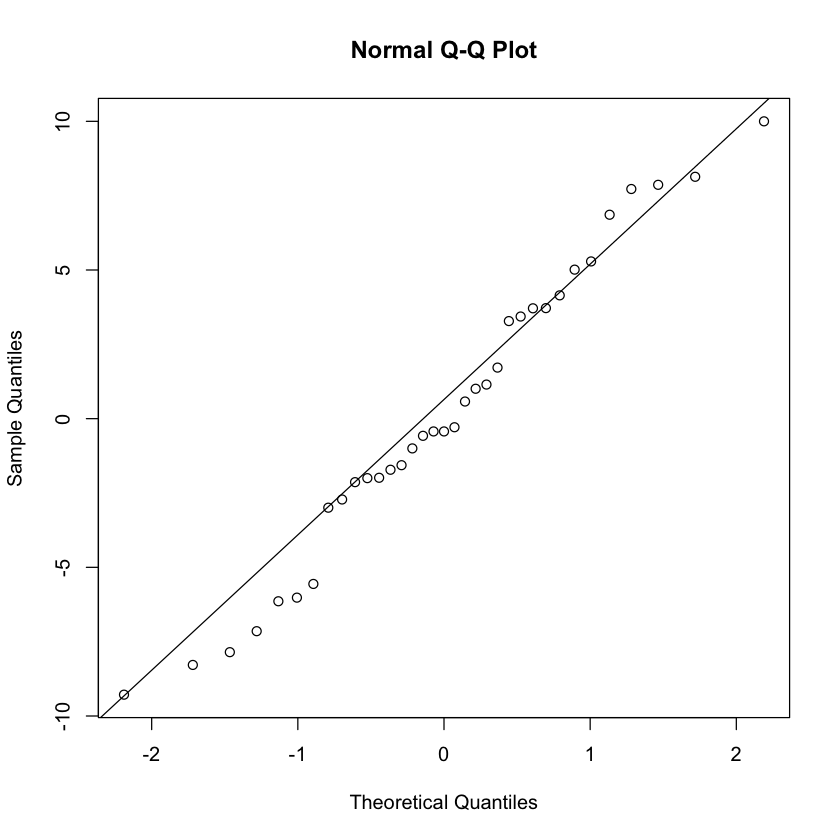

In [5]:
data(color)
m1.color=arima(color,order=c(1,0,0))
m1.color
plot(rstandard(m1.color),ylab='Standardized residuals',type='b')
abline(h=0)

qqnorm(residuals(m1.color))
qqline(residuals(m1.color))

#min(residuals(m1.color))
#max(residuals(m1.color))
#qqnorm(rstandard(m1.color))
#qqline(rstandard(m1.color))

shapiro.test(residuals(m1.color))

, , 1

             [,1]
 [1,] -0.05138241
 [2,]  0.03224346
 [3,]  0.04749703
 [4,]  0.02088157
 [5,] -0.01729829
 [6,] -0.01924314
 [7,] -0.17341651
 [8,] -0.28136877
 [9,]  0.06127493
[10,] -0.27045217
[11,] -0.05123367
[12,] -0.02712861
[13,]  0.18344079
[14,] -0.04423987
[15,]  0.18564229

[1] -0.051  0.032  0.047  0.021 -0.017 -0.019

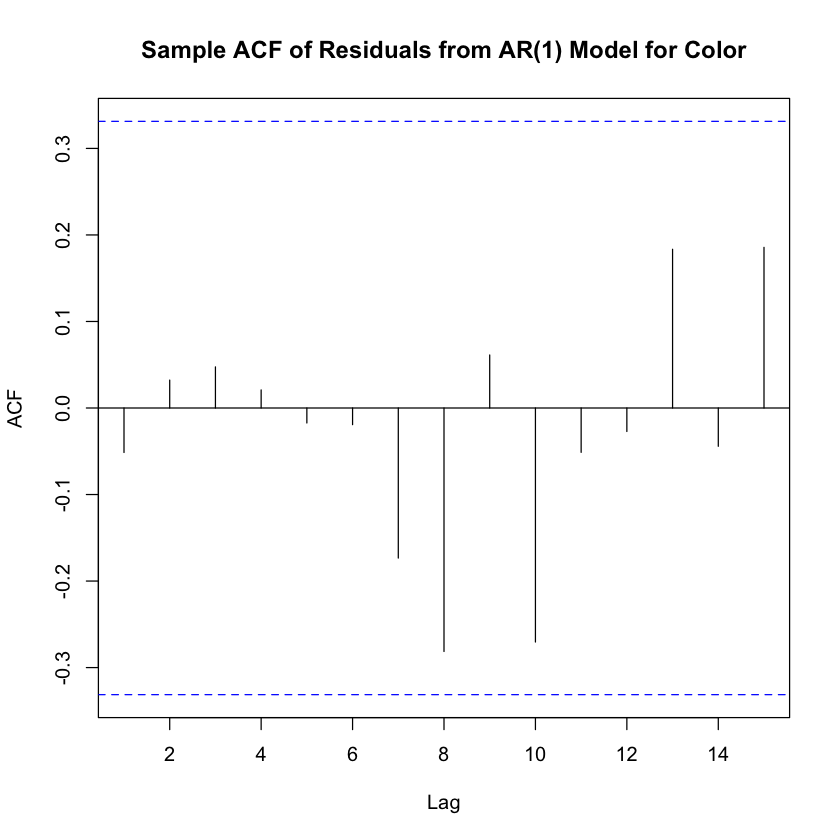

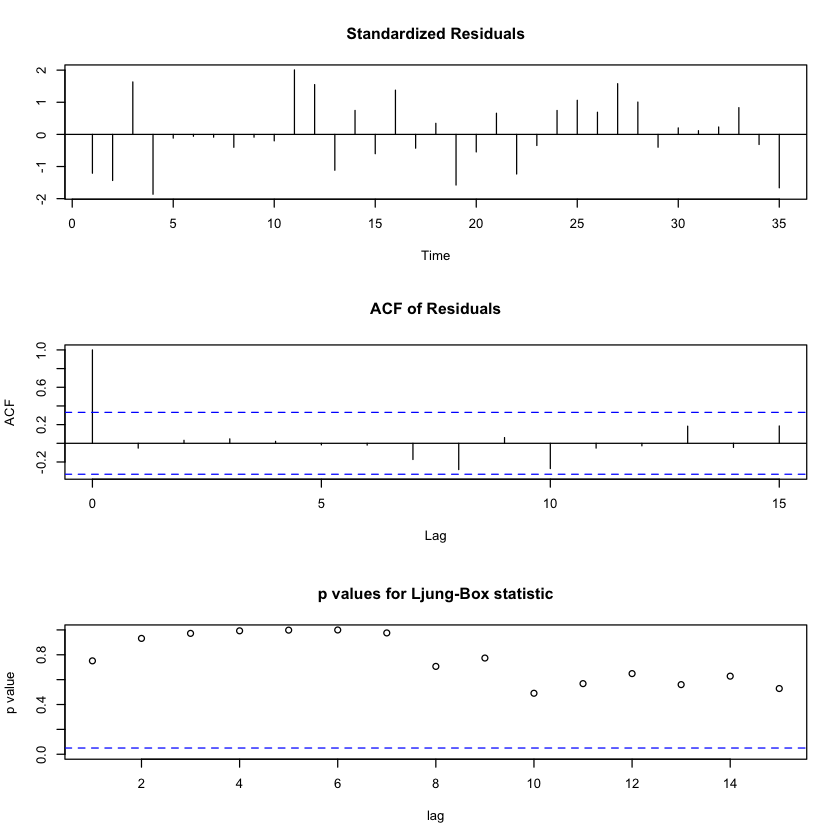

In [6]:
acf(residuals(m1.color),main='Sample ACF of Residuals from AR(1) Model for Color')
acf(residuals(m1.color),plot=F)$acf
signif(acf(residuals(m1.color),plot=F)$acf[1:6],2)# to display the first 6 acf
# to 2 significant digits.
tsdiag(m1.color,gof=15,omit.initial=F) 
# the tsdiag function is modified from that in the
# stats package of R.

### Output from the Ljung-Box test:
- On the AR(1) model for the color data:

In [7]:
Box.test(residuals(m1.color), lag = 6, type = "Ljung-Box", fitdf = 1)
# fitdf should be set to p+q.  Here, for this AR(1) model, p=1 and q=0 (no MA terms).

m1.color 

m2.color=arima(color,order=c(2,0,0))
m2.color

m3.color=arima(color,order=c(1,0,1))
m3.color

m4.color=arima(color,order=c(2,0,1))
m4.color


	Box-Ljung test

data:  residuals(m1.color)
X-squared = 0.28032, df = 5, p-value = 0.998



Call:
arima(x = color, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5705    74.3293
s.e.  0.1435     1.9151

sigma^2 estimated as 24.83:  log likelihood = -106.07,  aic = 216.15


Call:
arima(x = color, order = c(2, 0, 0))

Coefficients:
         ar1     ar2  intercept
      0.5173  0.1005    74.1551
s.e.  0.1717  0.1815     2.1463

sigma^2 estimated as 24.6:  log likelihood = -105.92,  aic = 217.84


Call:
arima(x = color, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.6721  -0.1467    74.1730
s.e.  0.2147   0.2742     2.1357

sigma^2 estimated as 24.63:  log likelihood = -105.94,  aic = 217.88


Call:
arima(x = color, order = c(2, 0, 1))

Coefficients:
         ar1     ar2     ma1  intercept
      0.2189  0.2735  0.3036    74.1653
s.e.  2.0056  1.1376  2.0650     2.1121

sigma^2 estimated as 24.58:  log likelihood = -105.91,  aic = 219.82

Try to check the residuals of m4.color and compare to the earlier results of m1.color

### Some Shumway-Stoffer examples:

In [8]:
data(varve)# glacial varve series

An MA(1) model seems appropriate for the differences of the logged thickness values. That implies an ARIMA(0,1,1) model for the logged thickness values


Call:
arima(x = log(varve), order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -0.7705
s.e.   0.0341

sigma^2 estimated as 0.2353:  log likelihood = -440.72,  aic = 883.44


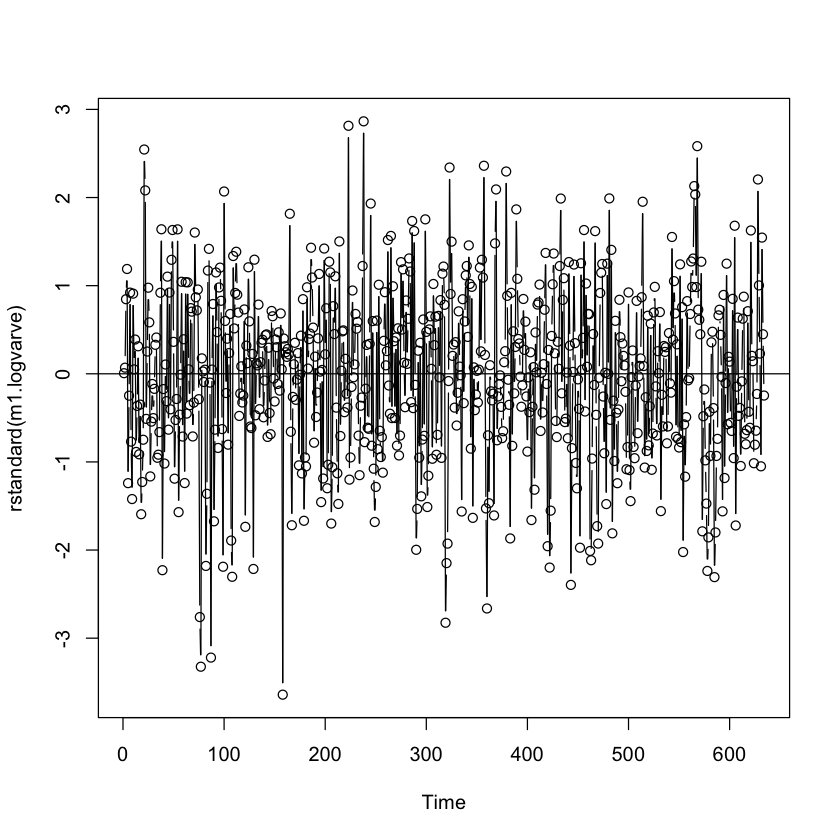

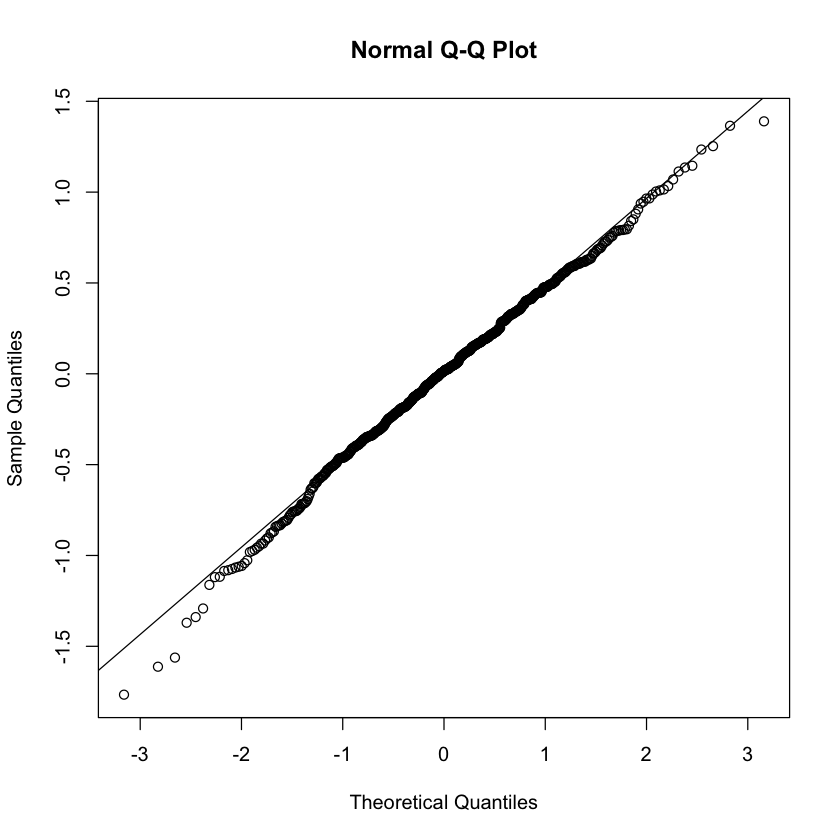

In [9]:
m1.logvarve <- arima(log(varve),order=c(0,1,1),method='ML') # maximum likelihood
print(m1.logvarve)
plot(rstandard(m1.logvarve),type='b')
abline(h=0)

qqnorm(residuals(m1.logvarve))
qqline(residuals(m1.logvarve))



	Shapiro-Wilk normality test

data:  residuals(m1.logvarve)
W = 0.99575, p-value = 0.08266


$pvalue
[1] 0.371

$observed.runs
[1] 306

$expected.runs
[1] 317.7445

$n1
[1] 308

$n2
[1] 326

$k
[1] 0

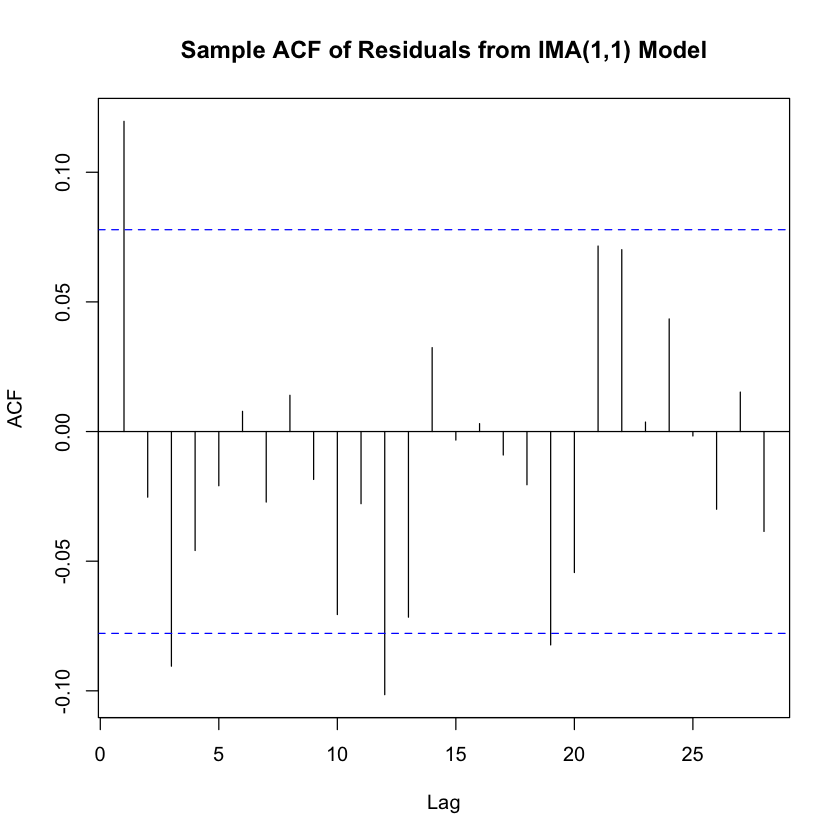

In [10]:
shapiro.test(residuals(m1.logvarve))

acf(residuals(m1.logvarve),main='Sample ACF of Residuals from IMA(1,1) Model')

runs(residuals(m1.logvarve))

### Should we include an AR term?


Call:
arima(x = log(varve), order = c(1, 1, 1), method = "ML")

Coefficients:
         ar1      ma1
      0.2330  -0.8858
s.e.  0.0518   0.0292

sigma^2 estimated as 0.2284:  log likelihood = -431.44,  aic = 866.88


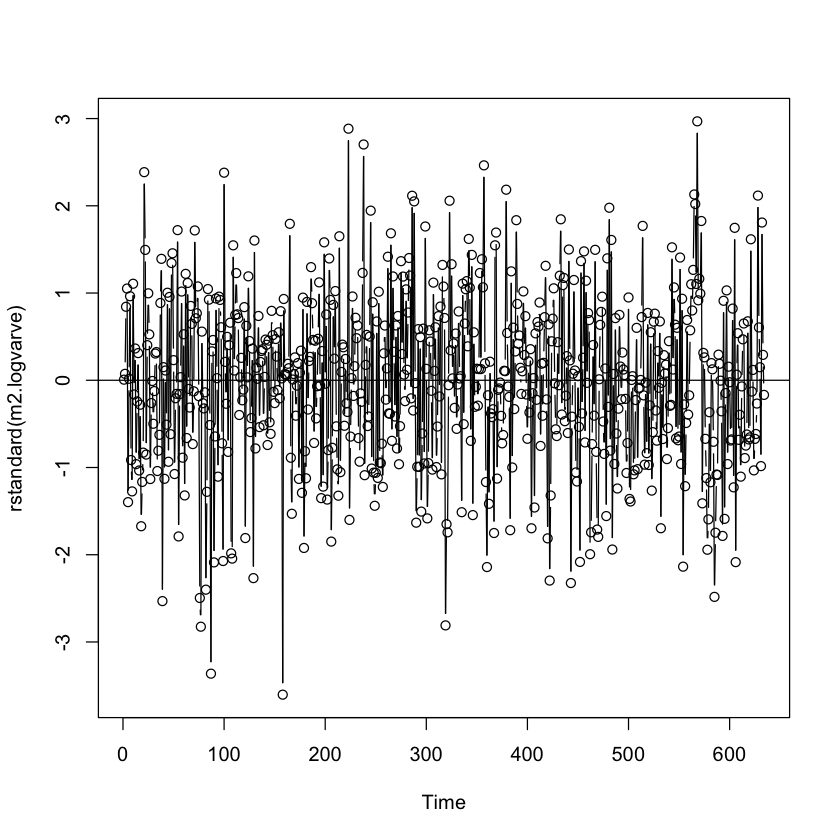

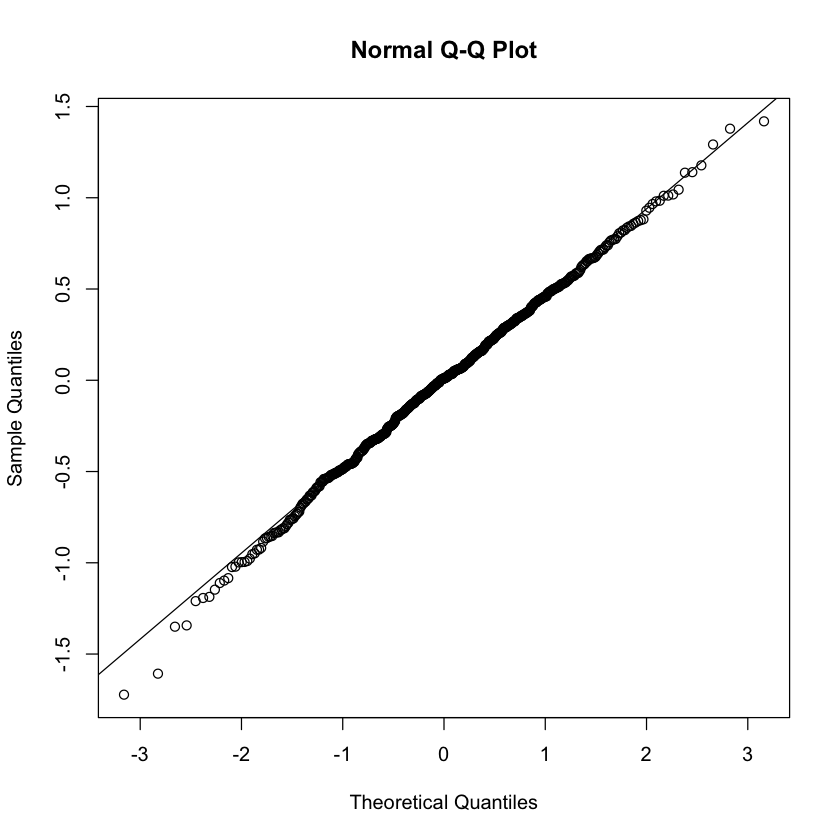

In [11]:
m2.logvarve <- arima(log(varve),order=c(1,1,1),method='ML') # maximum likelihood
print(m2.logvarve)
plot(rstandard(m2.logvarve),type='b')
abline(h=0)

qqnorm(residuals(m2.logvarve))
qqline(residuals(m2.logvarve))


	Shapiro-Wilk normality test

data:  residuals(m2.logvarve)
W = 0.99752, p-value = 0.4681


$pvalue
[1] 0.21

$observed.runs
[1] 334

$expected.runs
[1] 317.7445

$n1
[1] 308

$n2
[1] 326

$k
[1] 0

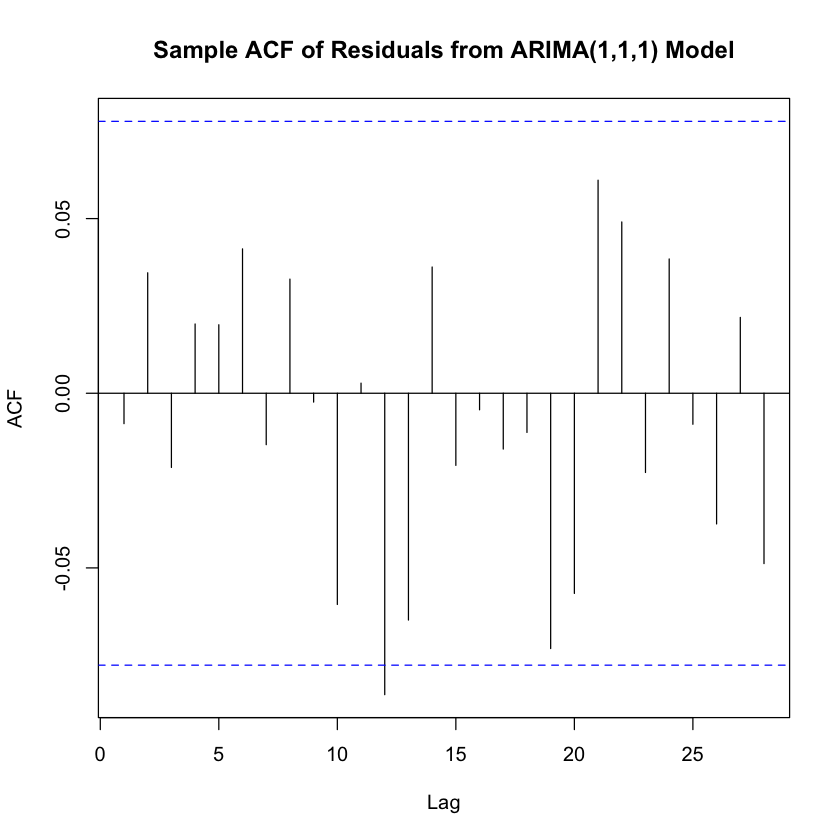

In [12]:
shapiro.test(residuals(m2.logvarve))

acf(residuals(m2.logvarve),main='Sample ACF of Residuals from ARIMA(1,1,1) Model')

runs(residuals(m2.logvarve))

- Is the AR coefficient in the estimated ARIMA(1,1,1) model significantly different from zero?
- What do the AIC's tell us?

### The U.S. GNP data:

In [13]:
data(gnp)# US GNP

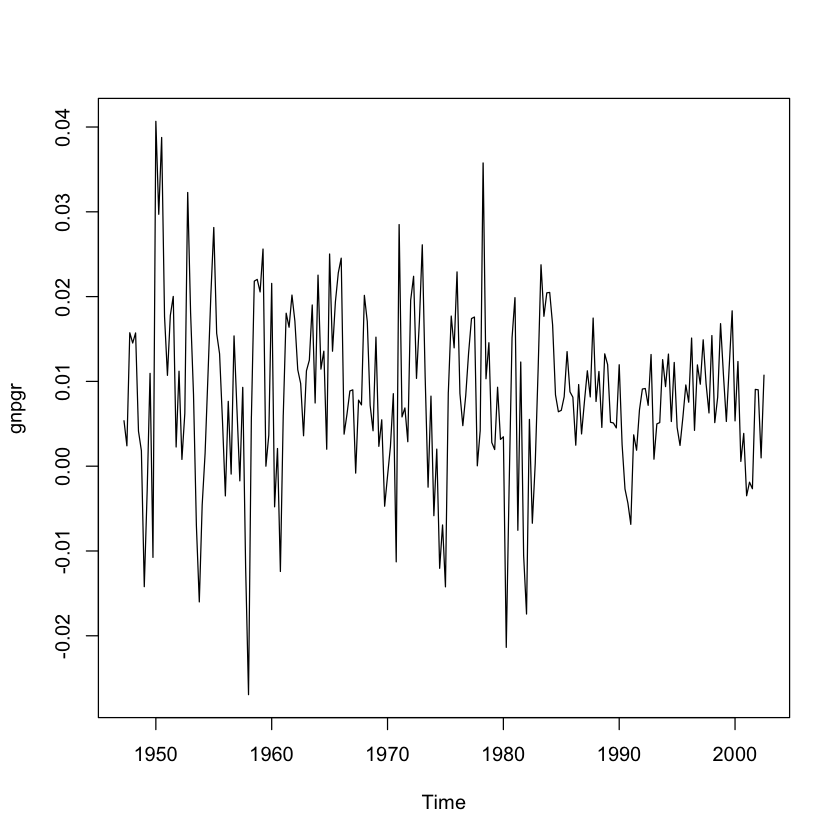

ACF,0.35,0.19,-0.01,-0.12,-0.17,-0.11,-0.09,-0.04,0.04,0.05,⋯,0.05,0.07,0.10,0.06,0.07,-0.09,-0.05,-0.10,-0.05,0.00
PACF,0.35,0.08,-0.11,-0.12,-0.09,0.01,-0.03,-0.02,0.05,0.01,⋯,0.10,0.00,0.02,-0.04,0.01,-0.11,0.03,-0.03,0.00,0.01



Call:
arima(x = gnpgr, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.3467     0.0083
s.e.  0.0627     0.0010

sigma^2 estimated as 9.03e-05:  log likelihood = 718.61,  aic = -1433.22


Call:
arima(x = gnpgr, order = c(0, 0, 2), method = "ML")

Coefficients:
         ma1     ma2  intercept
      0.3028  0.2036     0.0083
s.e.  0.0654  0.0644     0.0010

sigma^2 estimated as 8.919e-05:  log likelihood = 719.96,  aic = -1433.93

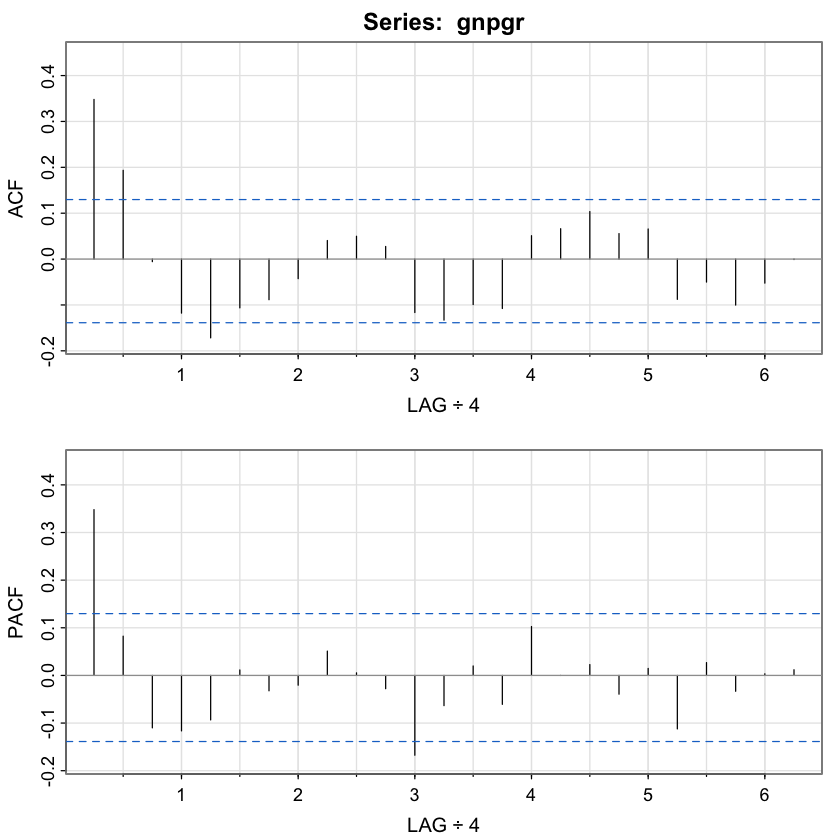

In [14]:
#plot(gnp)
#acf2(gnp,50)
gnpgr = diff(log(gnp))
plot(gnpgr)
acf2(gnpgr)

arima(gnpgr,order=c(1,0,0),method='ML') # fits an AR(1) model using ML
arima(gnpgr,order=c(0,0,2),method='ML') # fits an MA(2) model using ML

#### Some overfit models:

In [15]:
arima(gnpgr,order=c(2,0,0),method='ML') # fits an AR(2) model using ML
arima(gnpgr,order=c(0,0,3),method='ML') # fits an MA(3) model using ML
arima(gnpgr,order=c(1,0,2),method='ML') # fits an ARMA(1,2) model using ML


Call:
arima(x = gnpgr, order = c(2, 0, 0), method = "ML")

Coefficients:
         ar1     ar2  intercept
      0.3180  0.0820     0.0083
s.e.  0.0667  0.0668     0.0011

sigma^2 estimated as 8.968e-05:  log likelihood = 719.36,  aic = -1432.72


Call:
arima(x = gnpgr, order = c(0, 0, 3), method = "ML")

Coefficients:
         ma1     ma2     ma3  intercept
      0.3208  0.2479  0.0911     0.0083
s.e.  0.0662  0.0718  0.0701     0.0010

sigma^2 estimated as 8.853e-05:  log likelihood = 720.78,  aic = -1433.55


Call:
arima(x = gnpgr, order = c(1, 0, 2), method = "ML")

Coefficients:
         ar1     ma1     ma2  intercept
      0.2407  0.0760  0.1624     0.0083
s.e.  0.2066  0.2026  0.0851     0.0010

sigma^2 estimated as 8.877e-05:  log likelihood = 720.47,  aic = -1432.95